# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [3]:
f1 = lambda x: np.sign(x) * x + x**2
f2 = lambda x: np.sign(x) * x**2
f3 = lambda x: np.abs(np.sin(5 * x))**3
f4_1 = lambda x: 1 / (1 + x ** 2)
f4_2 = lambda x: 1 / (1 + 25 * x ** 2)
f4_3 = lambda x: 1 / (1 + 100 * x ** 2)
f5 = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

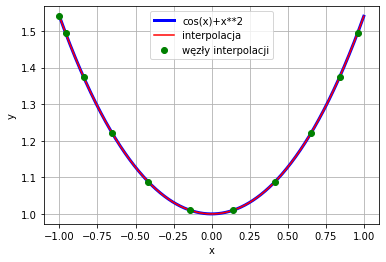

In [3]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 11
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

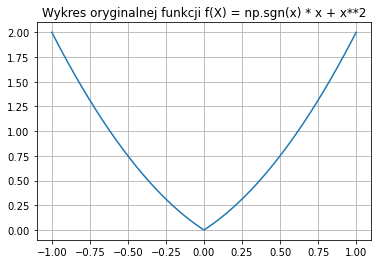

In [4]:
"Wykres oryginalnej funkcji ciągłej i nieróżniczkowalnej dla x należącego do przedziału (-1, 1)"

x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y = f1(x)
plt.plot(x, y)
plt.title('Wykres oryginalnej funkcji f(X) = np.sgn(x) * x + x**2')
plt.grid()
plt.show()

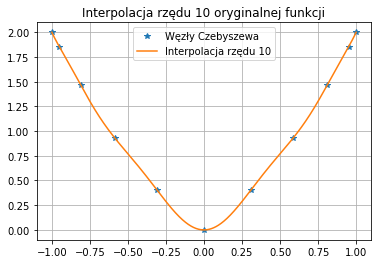

In [5]:
"Wykres interpolacji rzędu 10 oryginalnej funkcji"

cheb_nodes = main.chebyshev_nodes(10)
bar_weights = main.bar_czeb_weights(10)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
plt.plot(cheb_nodes, values, '*')
plt.plot(x, y)
plt.title('Interpolacja rzędu 10 oryginalnej funkcji')
plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu 10'])
plt.grid()
plt.show()

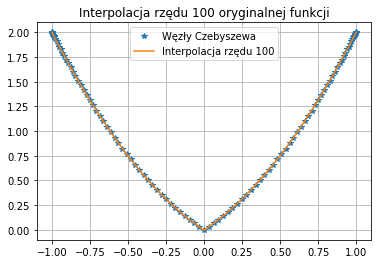

In [6]:
"Wykres interpolacji rzędu 100 oryginalnej funkcji"
cheb_nodes = main.chebyshev_nodes(100)
bar_weights = main.bar_czeb_weights(100)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
plt.plot(cheb_nodes, values, '*')
plt.plot(x, y)
plt.title('Interpolacja rzędu 100 oryginalnej funkcji')
plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu 100'])
plt.grid()
plt.show()

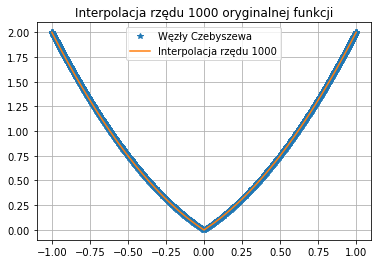

In [7]:
"Wykres interpolacji rzędu 1000 oryginalnej funkcji"
cheb_nodes = main.chebyshev_nodes(1000)
bar_weights = main.bar_czeb_weights(1000)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
plt.plot(cheb_nodes, values, '*')
plt.plot(x, y)
plt.title('Interpolacja rzędu 1000 oryginalnej funkcji')
plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu 1000'])
plt.grid()
plt.show()

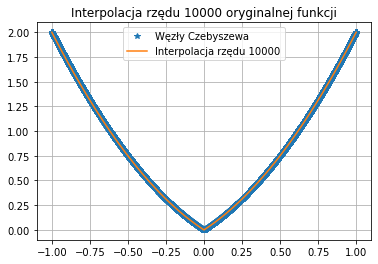

In [8]:
"Wykres interpolacji rzędu 10000 oryginalnej funkcji"
cheb_nodes = main.chebyshev_nodes(10000)
bar_weights = main.bar_czeb_weights(10000)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
plt.plot(cheb_nodes, values, '*')
plt.plot(x, y)
plt.title('Interpolacja rzędu 10000 oryginalnej funkcji')
plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu 10000'])
plt.grid()
plt.show()

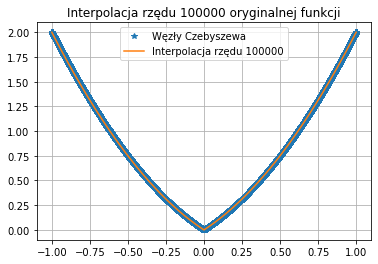

In [9]:
"Wykres interpolacji rzędu 100000 oryginalnej funkcji"
cheb_nodes = main.chebyshev_nodes(100000)
bar_weights = main.bar_czeb_weights(100000)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
plt.plot(cheb_nodes, values, '*')
plt.plot(x, y)
plt.title('Interpolacja rzędu 100000 oryginalnej funkcji')
plt.legend(['Węzły Czebyszewa', 'Interpolacja rzędu 100000'])
plt.grid()
plt.show()


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [10]:
"Tu ma być sup{[y1 - y2]}"

'Tu ma być sup{[y1 - y2]}'

In [11]:
"Sprawdzam jakość dla interpolacji rzędu 10"

x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y_oryginal_function = f1(x)
cheb_nodes = main.chebyshev_nodes(10)
bar_weights = main.bar_czeb_weights(10)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
quality = main.L_inf(y, y_oryginal_function)
print('n=10:', quality)

n=10: 0.05921962436810317


In [12]:
"Sprawdzam jakość dla interpolacji rzędu 100"

x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y_oryginal_function = f1(x)
cheb_nodes = main.chebyshev_nodes(100)
bar_weights = main.bar_czeb_weights(100)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
quality = main.L_inf(y, y_oryginal_function)
print('n=100:', quality)

n=100: 0.005965418924417044


In [13]:
"Sprawdzam jakość dla interpolacji rzędu 1000"

x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y_oryginal_function = f1(x)
cheb_nodes = main.chebyshev_nodes(1000)
bar_weights = main.bar_czeb_weights(1000)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
quality = main.L_inf(y, y_oryginal_function)
print('n=1000:', quality)

n=1000: 0.0005739642836658768


In [14]:
"Sprawdzam jakość dla interpolacji rzędu 10000"

x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y_oryginal_function = f1(x)
cheb_nodes = main.chebyshev_nodes(10000)
bar_weights = main.bar_czeb_weights(10000)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
quality = main.L_inf(y, y_oryginal_function)
print('n=10000:', quality)

n=10000: 8.303505128218853e-06


In [15]:
"Sprawdzam jakość dla interpolacji rzędu 100000"

x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y_oryginal_function = f1(x)
cheb_nodes = main.chebyshev_nodes(100000)
bar_weights = main.bar_czeb_weights(100000)
values = f1(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
quality = main.L_inf(y, y_oryginal_function)
print('n=100000:', quality)

n=100000: 6.550513111775423e-08


In [16]:
"Zgodnie z oczekiwaniami wraz ze wzrostem rzędu interpolacji n rośnie jakość interpolacji"

'Zgodnie z oczekiwaniami wraz ze wzrostem rzędu interpolacji n rośnie jakość interpolacji'

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

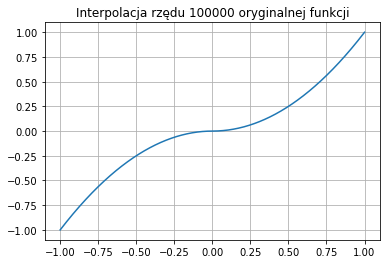

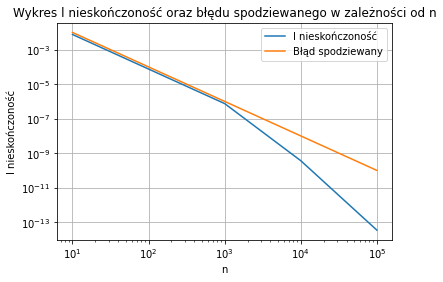

In [17]:
y_oryginal_function = f2(x)
quality = []
expected_error = []
n = [10, 100, 1000, 10000, 100000]
for i in n:
    cheb_nodes = main.chebyshev_nodes(i)
    bar_weights = main.bar_czeb_weights(i)
    values = f2(cheb_nodes)
    y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
    quality.append(main.L_inf(y, y_oryginal_function))
    expected_error.append(1 / i ** 2)

    
plt.plot(x, y)
plt.title('Interpolacja rzędu 100000 oryginalnej funkcji')
plt.grid()
plt.show()

plt.plot(n, quality)
plt.plot(n, expected_error)
plt.title('Wykres l nieskończoność oraz błędu spodziewanego w zależności od n')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('l nieskończoność')
plt.legend(['l nieskończoność', 'Błąd spodziewany'])
plt.grid()
plt.show()

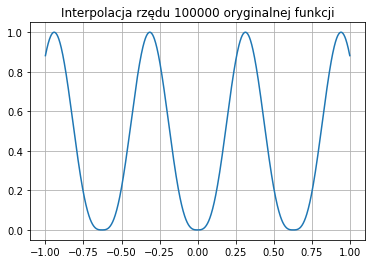

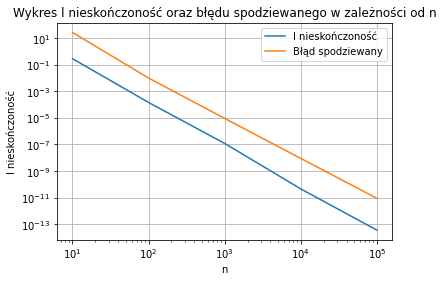

In [18]:
y_oryginal_function = f3(x)
quality = []
expected_error = []
V=2.102e4

for i in n:
    cheb_nodes = main.chebyshev_nodes(i)
    bar_weights = main.bar_czeb_weights(i)
    values = f3(cheb_nodes)
    y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
    quality.append(main.L_inf(y, y_oryginal_function))
    expected_error.append(4 * V / 3 / np.pi /(i - 3) ** 3)

               
               
plt.plot(x, y)
plt.title('Interpolacja rzędu 100000 oryginalnej funkcji')
plt.grid()
plt.show()

plt.plot(n, quality)
plt.plot(n, expected_error)
plt.title('Wykres l nieskończoność oraz błędu spodziewanego w zależności od n')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('l nieskończoność')
plt.legend(['l nieskończoność', 'Błąd spodziewany'])
plt.grid()
plt.show()

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

In [4]:
"Analiza funckji analitycznej dla a = 1"

y_original_function = f4_1(x)
plt.plot(x, y_original_function)
plt.grid()
plt.title('Funkcja analityczna dla a=1')
plt.show()

NameError: name 'x' is not defined

a= 1.4142135623730943 b= 0.999999999999999


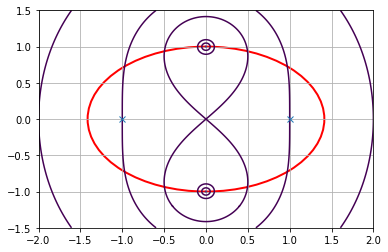

In [6]:
"Teraz wyznaczę a i b, oraz narysuje wykres dopasowanej elipsy rungego"

from matplotlib.patches import Ellipse
x = np.linspace(-2,2,2001)
y = np.linspace(-1.5,1.5,2001)
X, Y = np.meshgrid(x, y)
Z = 1/np.abs((1+(X+1j*Y)**2))
elipsa_f_rungego=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
b=1 - 1e-15
c=1
a=np.sqrt(1+b**2)

ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b,
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x')
ax.grid()
print('a=', a, 'b=', b)

NameError: name 'err' is not defined

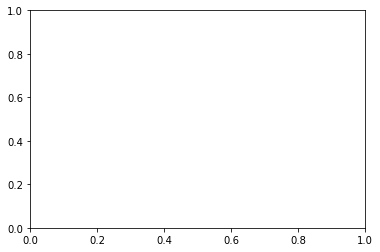

In [8]:
rho=a+b
M=f4_1(1j*b)
X=np.linspace(-1+1e-15,1-1e-15,1000)
expected_error=[]
I=[]
y_original_function=f4_1(X)
for i in range(2, 1000, 10):
    cheb_nodes=main.chebyshev_nodes(i)
    values=f4_1(cheb_nodes)
    bar_weights=main.bar_czeb_weights(i)
    Y=main.barycentric_inte(cheb_nodes,values,bar_weights,X)
    expected_error.append(main.L_inf(Y, y_original_function))
    I.append(i)

runge_zbieznosc=plt.figure()
ax=plt.gca()
ax.semilogy(I,err,label='l nieskończoność')
oszacowanie=[4*np.real(M)*rho**(-x)/(rho-1) for x in I]
ax.semilogy(I,oszacowanie,label='oszacowanie')
ax.set_xlabel('n')
ax.set_ylabel('||f-p||')
ax.grid()
ax.legend()

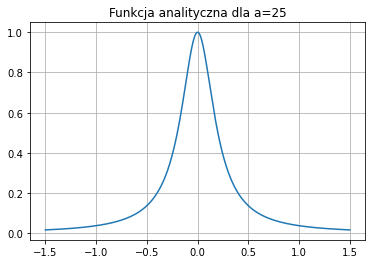

In [11]:
"Analiza funckji analitycznej dla a = 25"

y_original = f4_2(x)
plt.plot(x, y_original_function)
plt.grid()
plt.title('Funkcja analityczna dla a=25')
plt.show()

a= 1.0198039027185568 b= 0.199999999999999


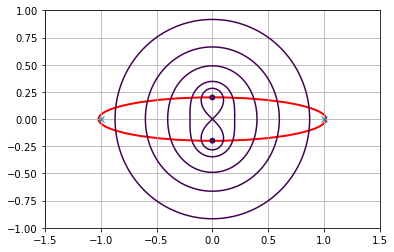

In [9]:
x = np.linspace(-1.5,1.5,2000)
y = np.linspace(-1,1,2000)
X, Y = np.meshgrid(x, y)
Z = 1/np.abs((1+25*(X+1j*Y)**2))
elipsa_f_rungego=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
b=0.2 - 1e-15
c=1
a=np.sqrt(1+b**2)

ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b,
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x')
ax.grid()
print('a=', a, 'b=', b)

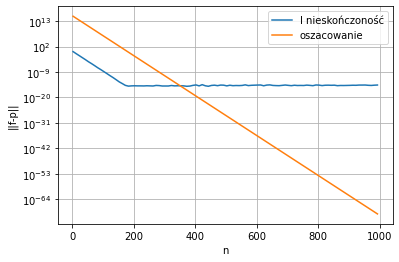

In [11]:
rho=a+b
M=f4_2(1j*b)
X=np.linspace(-1+1e-15,1-1e-15,101)
expected_error=[]
I=[]
y_original_function=f4_2(X)
for i in range(2, 1000, 10):
    cheb_nodes=main.chebyshev_nodes(i)
    values=f4_2(cheb_nodes)
    bar_weights=main.bar_czeb_weights(i)
    Y=main.barycentric_inte(cheb_nodes,values,bar_weights,X)
    expected_error.append(main.L_inf(Y, y_original_function))
    I.append(i)

runge_zbieznosc=plt.figure()
ax=plt.gca()
ax.semilogy(I,expected_error,label='l nieskończoność')
oszacowanie=[4*np.real(M)*rho**(-x)/(rho-1) for x in I]
ax.semilogy(I,oszacowanie,label='oszacowanie')
ax.set_xlabel('n')
ax.set_ylabel('||f-p||')
ax.grid()
ax.legend()

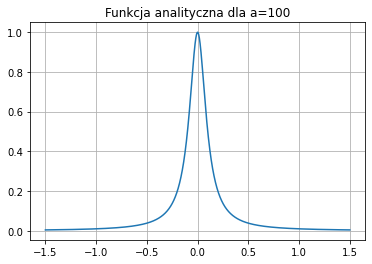

In [13]:
"Analiza funckji analitycznej dla a = 100"

y_original_function = f4_3(x)
plt.plot(x, y_original_function)
plt.grid()
plt.title('Funkcja analityczna dla a=100')
plt.show()

a= 1.004987562112089 b= 0.099999999999999


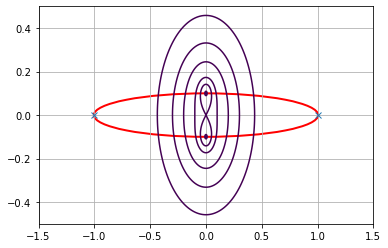

In [15]:
x = np.linspace(-1.5,1.5,2000)
y = np.linspace(-.5,.5,2000)
X, Y = np.meshgrid(x, y)
Z = 1/np.abs((1+100*(X+1j*Y)**2))
elipsa_f_rungego=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])
b=0.1 - 1e-15
c=1
a=np.sqrt(1+b**2)

ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b,
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x')
ax.grid()
print('a=', a, 'b=', b)

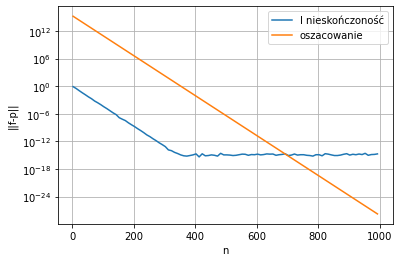

In [16]:
rho=a+b
M=f4_3(1j*b)
X=np.linspace(-1+1e-15,1-1e-15,101)
expected_error=[]
I=[]
y_original_function=f4_3(X)
for i in range(2, 1000, 10):
    cheb_nodes=main.chebyshev_nodes(i)
    values=f4_3(cheb_nodes)
    bar_weights=main.bar_czeb_weights(i)
    Y=main.barycentric_inte(cheb_nodes,values,bar_weights,X)
    expected_error.append(main.L_inf(Y, y_original_function))
    I.append(i)

runge_zbieznosc=plt.figure()
ax=plt.gca()
ax.semilogy(I,expected_error,label='l nieskończoność')
oszacowanie=[4*np.real(M)*rho**(-x)/(rho-1) for x in I]
ax.semilogy(I,oszacowanie,label='oszacowanie')
ax.set_xlabel('n')
ax.set_ylabel('||f-p||')
ax.grid()
ax.legend()

In [ ]:
"""Na każdym z wykresów możemy zauważyć rzeczywisty błąd oraz błąd szacowany w pewnym momencie zaczyna utrzymywać stałą 
wartość około 10e-16. Jest to spowodowane ograniczeniem reprezentacji małych liczb przez zero maszynowe. """

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

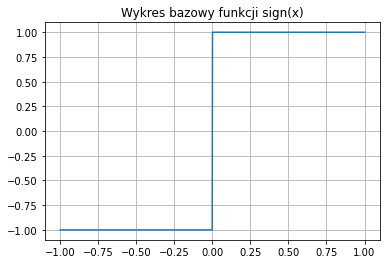

In [20]:
x = np.linspace(-1 + 1e-15, 1 - 1e-15, 1000)
y_original_function = f5(x)
plt.plot(x, y_original_function)
plt.title('Wykres bazowy funkcji sign(x)')
plt.grid()
plt.show()

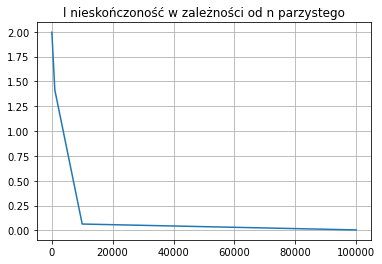

In [21]:
"Wykres zależności błędu od rzędu interpolacji n"

quality = []
n = [10, 100, 1000, 10000, 100000]
for i in n:
    cheb_nodes = main.chebyshev_nodes(i)
    bar_weights = main.bar_czeb_weights(i)
    values = f5(cheb_nodes)
    y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
    quality.append(main.L_inf(y, y_original_function))

plt.plot(n, quality)
plt.title('l nieskończoność w zależności od n parzystego')
plt.grid()
plt.show()

In [22]:
print("Na powyższym wykresie widać, że niezależnie od rzędu interpolacji, minimalny błąd jest nie mniejszy niż:\n", quality[-1])

Na powyższym wykresie widać, że niezależnie od rzędu interpolacji, minimalny błąd jest nie mniejszy niż:
 0.004237676564605719


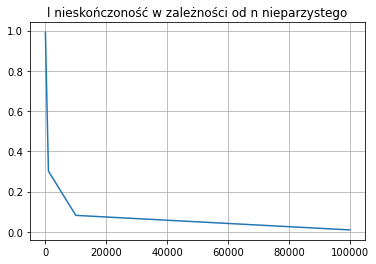

In [23]:
"Teraz przeprowadzam analizę dla nieparzystych n"

n = [11, 101, 1001, 10001, 100001]
quality = []
for i in n:
    cheb_nodes = main.chebyshev_nodes(i)
    bar_weights = main.bar_czeb_weights(i)
    values = f5(cheb_nodes)
    y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
    quality.append(main.L_inf(y, y_original_function))
    
plt.plot(n, quality)
plt.title('l nieskończoność w zależności od n nieparzystego')
plt.grid()
plt.show()

In [24]:
print("Dla liczb nieparzystych najmniejszy błąd to:\n", quality[-1])

Dla liczb nieparzystych najmniejszy błąd to:
 0.009078875738513292


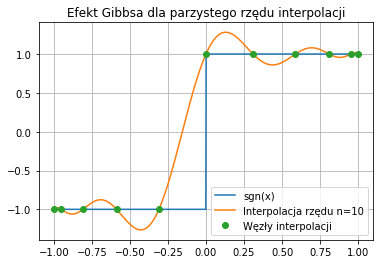

Błąd interpolacji: 1.9955397937402308


In [25]:
"Aby odpowiedzieć na zadane pytanie w poleceniu - Dlaczego wartości dla parzystych i nieparzystych n się różnią?, tworzę 2 wykresy pomocnicze rzędu 10 i 11"

cheb_nodes = main.chebyshev_nodes(10)
bar_weights = main.bar_czeb_weights(10)
values = f5(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
plt.plot(x, f5(x))
plt.plot(x, y)
plt.plot(cheb_nodes, values, 'o')
plt.title('Efekt Gibbsa dla parzystego rzędu interpolacji')
plt.legend(['sgn(x)', 'Interpolacja rzędu n=10', 'Węzły interpolacji'])
plt.grid()
plt.show()
print('Błąd interpolacji:',main.L_inf(y, f5(x)))

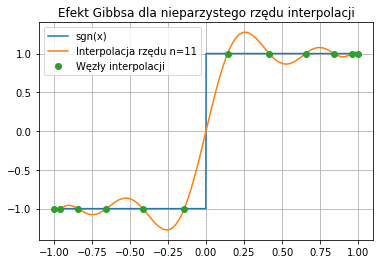

Błąd interpolacji: 0.9917946843767556


In [26]:
cheb_nodes = main.chebyshev_nodes(11)
bar_weights = main.bar_czeb_weights(11)
values = f5(cheb_nodes)
y = main.barycentric_inte(cheb_nodes, values, bar_weights, x)
plt.plot(x, f5(x))
plt.plot(x, y)
plt.plot(cheb_nodes, values, 'o')
plt.title('Efekt Gibbsa dla nieparzystego rzędu interpolacji')
plt.legend(['sgn(x)', 'Interpolacja rzędu n=11', 'Węzły interpolacji'])
plt.grid()
plt.show()
print('Błąd interpolacji:',main.L_inf(y, f5(x)))

In [ ]:
""""Na podstawie powyższych wykresów łatwo zlokalizować różnicę między parzystymi i nieparzystymi n. Pierwszą z nich jest to, że 
węzły Czebyszewa są inaczej rozstawione dla n parzystych niż dla n nieparzystych. W przypadku parzystego rzędu interpolacji, 
na środku badanego zakresu pojawia się jeden węzeł, dla którego wartość funkcji wynosi 1 co sprawia, że interpolowana funkcja 
jest niesymetryczna względem osi OY. Z kolei dla nieparzystej n nie powstaje wtedy węzeł interpolacyjny i wtedy 
interpolowana funkcja jest symetryczna względem wykresu funkcji oryginalnej, a więc rozwiązuje to problem, który występuje w 
przypadku n parzystych.""""

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)